# Riskified Code Assessment

#### 0: Setup and Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Analyst_Coding_Test_(1)_(2).csv")

In [3]:
df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


In [4]:
# Checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   shape   1000 non-null   object 
 1   color   1000 non-null   object 
 2   area    1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [5]:
df['shape'].value_counts()

square      477
triangle    403
circle      120
Name: shape, dtype: int64

In [6]:
df['color'].value_counts()

blue      360
red       290
yellow    272
green      78
Name: color, dtype: int64

In [7]:
df['area'].describe()

count     1000.000000
mean      3945.289900
std       4754.205318
min          0.800000
25%        758.250000
50%       2610.800000
75%       5492.450000
max      31415.900000
Name: area, dtype: float64

#### 1: Draw a Boxplot displaying the area distribution of the shapes

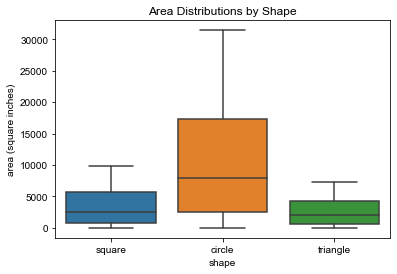

In [8]:
fig, ax = plt.subplots()

sns.set_style('darkgrid')
sns.boxplot(x = df['shape'], y = df['area'], ax = ax)

ax.set_title('Area Distributions by Shape')
ax.set_ylabel('area (square inches)')

plt.show()

#### 2: Calculate the mean, max, and standard deviation of the area for each color

In [9]:
def get_color_info(color, att):
    """
    Returns the mean, max, and standard deviation for a given color
    If the color doesn't exist, will return NaNs
    """
    color_df = df.loc[df['color'] == color]

    return color_df['area'].describe()[att]


In [10]:
# Calculate for green
mean = get_color_info('green', 'mean')
max = get_color_info('green', 'max')
std = get_color_info('green', 'std')

print(f"mean: {mean} \nmax: {max} \nstandard dev: {std}")

mean: 5761.119230769232 
max: 27759.1 
standard dev: 6695.029606348661


In [11]:
# Calculate for red
mean = get_color_info('red', 'mean')
max = get_color_info('red', 'max')
std = get_color_info('red', 'std')

print(f"mean: {mean} \nmax: {max} \nstandard dev: {std}")

mean: 3815.8710344827646 
max: 31415.9 
standard dev: 5092.678376780838


In [12]:
# Calculate for blue
mean = get_color_info('blue', 'mean')
max = get_color_info('blue', 'max')
std = get_color_info('blue', 'std')

print(f"mean: {mean} \nmax: {max} \nstandard dev: {std}")

mean: 3208.1316666666735 
max: 21642.4 
standard dev: 3039.2129648171303


In [13]:
# Calculate for yellow
mean = get_color_info('yellow', 'mean')
max = get_color_info('yellow', 'max')
std = get_color_info('yellow', 'std')

print(f"mean: {mean} \nmax: {max} \nstandard dev: {std}")

mean: 4538.208088235295 
max: 31415.9 
standard dev: 5352.460578324455


In [14]:
# Test case for color that doesn't exist
mean = get_color_info('purple', 'mean')
max = get_color_info('purple', 'max')
std = get_color_info('purple', 'std')

print(f"mean: {mean} \nmax: {max} \nstandard dev: {std}")

mean: nan 
max: nan 
standard dev: nan


#### 3: Calculate the average area of a yellow square

In [15]:
df.loc[df['shape'] == 'square'].loc[df['color'] == 'yellow']['area'].agg('mean')

3333.2072072072074

#### 4: Calculate which shape is most likely to be green

In [16]:
square_df = df.loc[df['shape'] == 'square']
circle_df = df.loc[df['shape'] == 'circle']
triangle_df = df.loc[df['shape'] == 'triangle']

In [17]:
square_prob_green = len(square_df.loc[square_df['color'] == 'green']) / len(square_df)
square_prob_green

0.09853249475890985

In [18]:
circle_prob_green = len(circle_df.loc[circle_df['color'] == 'green']) / len(circle_df)
circle_prob_green

0.25833333333333336

In [19]:
triangle_prob_green = len(triangle_df.loc[triangle_df['color'] == 'green']) / len(triangle_df)
triangle_prob_green

0.0

Circles have the highest probability of being green

#### 5: Calculate the odds of each shape given the area is greater than 3,000 and the color is red

In [20]:
red_df = df.loc[df['color'] == 'red']
given_df = red_df.loc[red_df['area'] > 3000]

In [21]:
given_df['shape'].value_counts()

triangle    84
square      21
circle      20
Name: shape, dtype: int64

In [22]:
triangle_odds = 84/len(given_df)
square_odds = 21/len(given_df)
circle_odds = 20/len(given_df)

#### 6: Define a function that calculates the side or radius of a shape 

In [23]:
def find_side(entry):
    '''
    Calculates the side or radius length for a given shape
    '''
    if entry['shape'] == 'circle':
        return np.sqrt(entry['area'] / np.pi)
    elif entry['shape'] == 'square':
        return np.sqrt(entry['area'])
    elif entry['shape'] == 'triangle':
        return np.sqrt(entry['area'] / (np.sqrt(3) * 4))
    else:
        return np.nan

#### 7: Create new column for the side or radius of each shape (as an int) 

In [24]:
df['side'] = df.apply(find_side, axis = 1)

In [25]:
df.head()

,shape,color,area,side
0,square,yellow,9409.0,97.000000
1,circle,yellow,4071.5,35.999982
2,triangle,blue,2028.0,17.108962
3,square,blue,3025.0,55.000000
4,square,blue,9216.0,96.000000


#### 8: Draw a boxplot of each side/radius by shape and make inferences

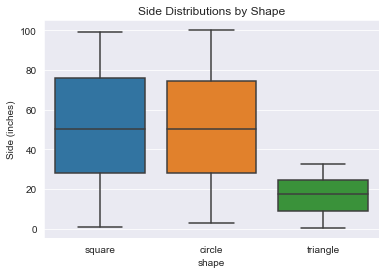

In [26]:
fig, ax = plt.subplots()

sns.set_style('darkgrid')
sns.boxplot(x = df['shape'], y = df['side'], ax = ax)

ax.set_title('Side Distributions by Shape')
ax.set_ylabel('Side (inches)')

plt.show()

Despite having a much larger spread in area's, circles and squares have very similar side/radius distributions. This is expected, as reexamining the Area distributions shows that the variance of circle's area is about Pi times larger.

#### 9: Draw a scatterplot with the given constraints: x = side, y = area, color = shape 

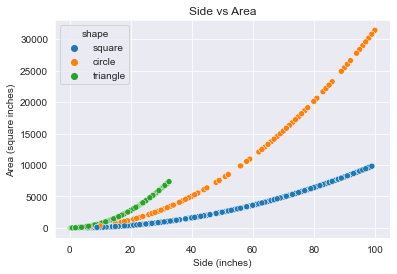

In [27]:
fig, ax = plt.subplots()

sns.set_style('darkgrid')
sns.scatterplot(x = df['side'], y = df['area'], hue = df['shape'], ax = ax)

ax.set_title('Side vs Area')
ax.set_ylabel('Area (square inches)')
ax.set_xlabel('Side (inches)')

plt.show()

#### 10: Create dataframes for the following scenarios for each shape

10 a: Proportion of red to total for each shape

In [28]:
red_prop_df = pd.DataFrame(columns = ['square_prob', 'circle_prob', 'triangle_prob'])


In [29]:
df['is_red'] = df.apply(lambda x: x['color'] == 'red', axis = 1)

In [30]:
square_df = df.loc[df['shape'] == 'square']
circle_df = df.loc[df['shape'] == 'circle']
triangle_df = df.loc[df['shape'] == 'triangle']

In [33]:
square_prob = square_df['is_red'].aggregate(sum) / len(square_df)
circle_prob= circle_df['is_red'].aggregate(sum) / len(circle_df)
triangle_prob = triangle_df['is_red'].aggregate(sum) / len(triangle_df)

In [35]:
red_prop_df.add([square_prob, circle_prob, triangle_prob])

ValueError: Unable to coerce to Series, length must be 4: given 3

10 b: Proportion of blue area to total area

#### 11: Define a function that calculates the proportion of a color's area to the total area by shape